# <center>Customer Segment Prediction

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Task 1: Data Loading & Exploration

In [2]:
df = pd.read_csv('Customers.csv')

In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Task 2: Create Scatter Plot between Annual Income & Spending Score

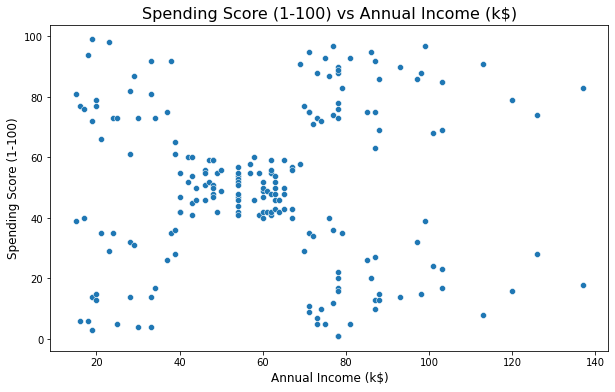

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df);
plt.xlabel('Annual Income (k$)',fontsize=12)
plt.ylabel('Spending Score (1-100)',fontsize=12) 
plt.title('Spending Score (1-100) vs Annual Income (k$)',fontsize=16)
plt.show()

# Task 3: Perform Scaling using MinMaxScaler

In [8]:
data = df.iloc[:, [3, 4]].values
print("Data before scaling : \n")
print(data)

Data before scaling : 

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  6

In [9]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [10]:
print("Max limit : ",scaler.data_max_)
print("Min limit : ",scaler.data_min_)

Max limit :  [137.  99.]
Min limit :  [15.  1.]


In [11]:
print("Data after scaling : \n")
print(scaled_data)

Data after scaling : 

[[0.         0.3877551 ]
 [0.         0.81632653]
 [0.00819672 0.05102041]
 [0.00819672 0.7755102 ]
 [0.01639344 0.39795918]
 [0.01639344 0.76530612]
 [0.02459016 0.05102041]
 [0.02459016 0.94897959]
 [0.03278689 0.02040816]
 [0.03278689 0.7244898 ]
 [0.03278689 0.13265306]
 [0.03278689 1.        ]
 [0.04098361 0.14285714]
 [0.04098361 0.7755102 ]
 [0.04098361 0.12244898]
 [0.04098361 0.79591837]
 [0.04918033 0.34693878]
 [0.04918033 0.66326531]
 [0.06557377 0.28571429]
 [0.06557377 0.98979592]
 [0.07377049 0.34693878]
 [0.07377049 0.73469388]
 [0.08196721 0.04081633]
 [0.08196721 0.73469388]
 [0.10655738 0.13265306]
 [0.10655738 0.82653061]
 [0.10655738 0.31632653]
 [0.10655738 0.6122449 ]
 [0.1147541  0.30612245]
 [0.1147541  0.87755102]
 [0.12295082 0.03061224]
 [0.12295082 0.73469388]
 [0.14754098 0.03061224]
 [0.14754098 0.92857143]
 [0.14754098 0.13265306]
 [0.14754098 0.81632653]
 [0.1557377  0.16326531]
 [0.1557377  0.73469388]
 [0.18032787 0.25510204]
 [

# Task 4: Develop Clusters using KMeans

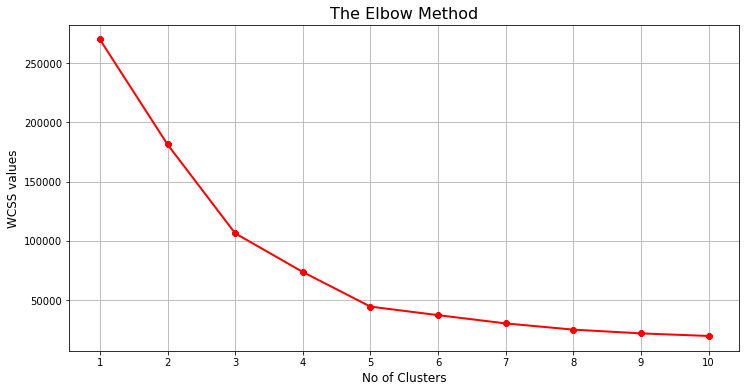

In [12]:
# let's plot elbow method graph
wcss = []

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker ="8")
plt.xticks(np.arange(1,11,1))
plt.title('The Elbow Method',fontsize=16)
plt.xlabel("No of Clusters",fontsize=12)
plt.ylabel("WCSS values",fontsize=12)
plt.grid()
plt.show()

In [13]:
# so applying take five cluster on the basis of elbow method
kmeans = KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)

In [14]:
# predict the cluster
y_kmeans = kmeans.fit_predict(data)

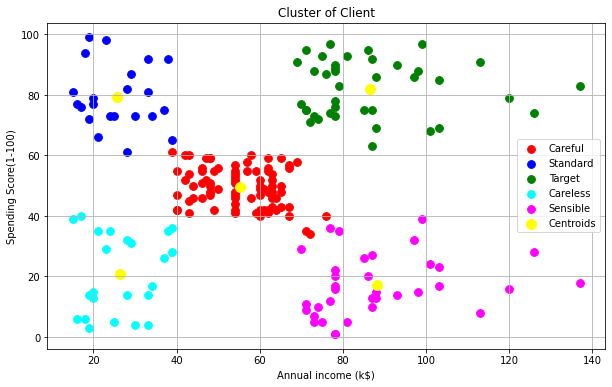

In [15]:
# Visualising the five Cluster
plt.figure(figsize=(10,6))
plt.scatter(data[y_kmeans == 0, 0],data[y_kmeans == 0, 1],s=60,c='red',label='Careful')
plt.scatter(data[y_kmeans == 1, 0],data[y_kmeans == 1, 1],s=60,c='blue',label='Standard')
plt.scatter(data[y_kmeans == 2, 0],data[y_kmeans == 2, 1],s=60,c='green',label='Target')
plt.scatter(data[y_kmeans == 3, 0],data[y_kmeans == 3, 1],s=60,c='cyan',label='Careless')
plt.scatter(data[y_kmeans == 4, 0],data[y_kmeans == 4, 1],s=60,c='magenta',label='Sensible')

# apply centroid for all cluster
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],s=100,c='yellow',label='Centroids')
plt.title('Cluster of Client')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.grid()
plt.show()